Mutli class classification using ANN

784 input nodes ,128 nodes in hidden layer, 10 output nodes (0--------9)


In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [28]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

3


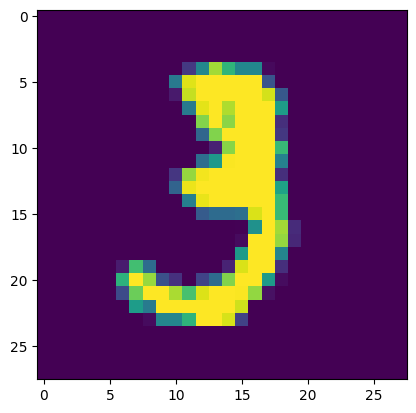

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])
print(y_train[10])

humme apne array ko 0 to 1 ki rage me lana padega , kyuki , neaural network me values jitne same range ki hoti hai , hummare weights jaldi se nikal ke aate hai , convergence sahi se milti hai

therefore we divide every value by 255

In [31]:
X_train = X_train/255
X_test = X_test/255

In [32]:
model = Sequential()

humme 28*28 ke shape se 1784 ki shape me ana padega , flatten karna padega

In [33]:
model.add(Flatten(input_shape=(28,28)))

In [34]:
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


isme humme apne label ko one hot encode nahi karna pdata

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [37]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2895 - accuracy: 0.9158 - val_loss: 0.1658 - val_accuracy: 0.9522
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1216 - accuracy: 0.9639 - val_loss: 0.1143 - val_accuracy: 0.9689
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9747 - val_loss: 0.1099 - val_accuracy: 0.9679
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.1028 - val_accuracy: 0.9721
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0495 - accuracy: 0.9841 - val_loss: 0.0948 - val_accuracy: 0.9744
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.0940 - val_accuracy: 0.9747
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.1036 - val_accuracy:

In [38]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [39]:
y_pred = y_prob.argmax(axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9768

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

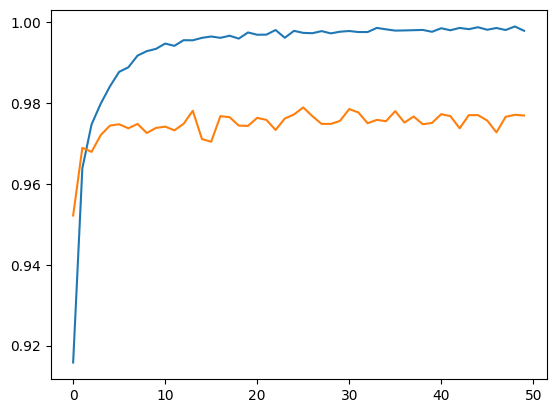

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

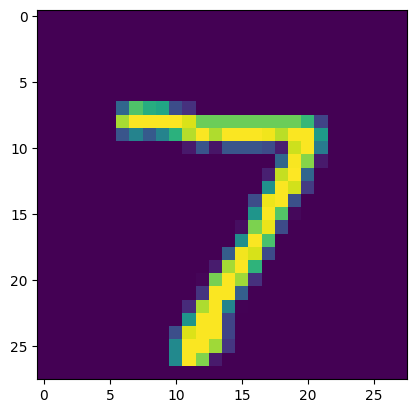

In [42]:
plt.imshow(X_test[0])

In [43]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 23ms/step


array([7])